<a href="https://colab.research.google.com/github/salaheslim/Deep-learning-prac1/blob/main/CNN_Assesment_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reading images

saving in list , array,
adjusting labels

checking :size
checking size you have
resize
grayscale or color
graphs :data augmentation
CNN
Evaluation


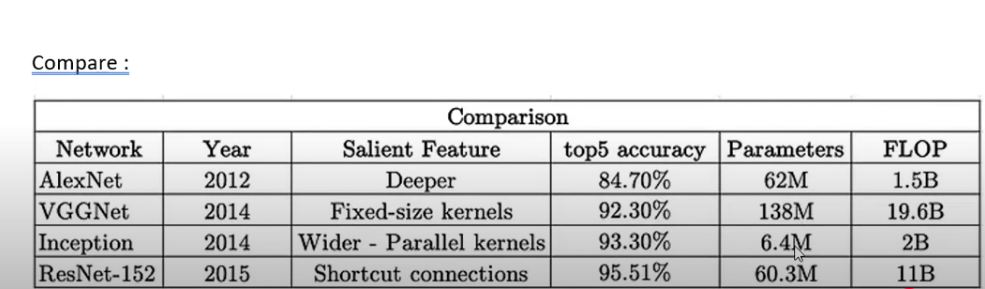

#1- Data preparation and statistics (LO1, LO2)


  ### Imorting libraries for data visulization and modele building.




In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import cv2
from tqdm import tqdm
import random


###Data Loading (CIFAR-10)

*   The CIFAR-10 dataset is loaded directly from Keras.
*   It is automatically downloaded and split into training and testing sets






In [3]:
data=(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### Data Statistics and Shapes

*   Print the shapes of the loaded datasets to understanding the data dimensions.

*   Check the number of unique classes in the training labels.
*   Check the pixel value range. CIFAR-10 images are typically 8-bit, so values range from 0 to 255.





In [4]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Pixel min value: {x_train.min()}")
print(f"Pixel max value: {x_train.max()}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Number of classes: 10
Pixel min value: 0
Pixel max value: 255




*   Check the class names for CIFAR-10 this helps with visualization and makes it easier to interpret results.


In [5]:

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(f"Classes: {classes}")


Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


###Data Visualization (Sample Images)


*  show random selection of images from training data to get visual overview of the data and it is helps for data exploration.


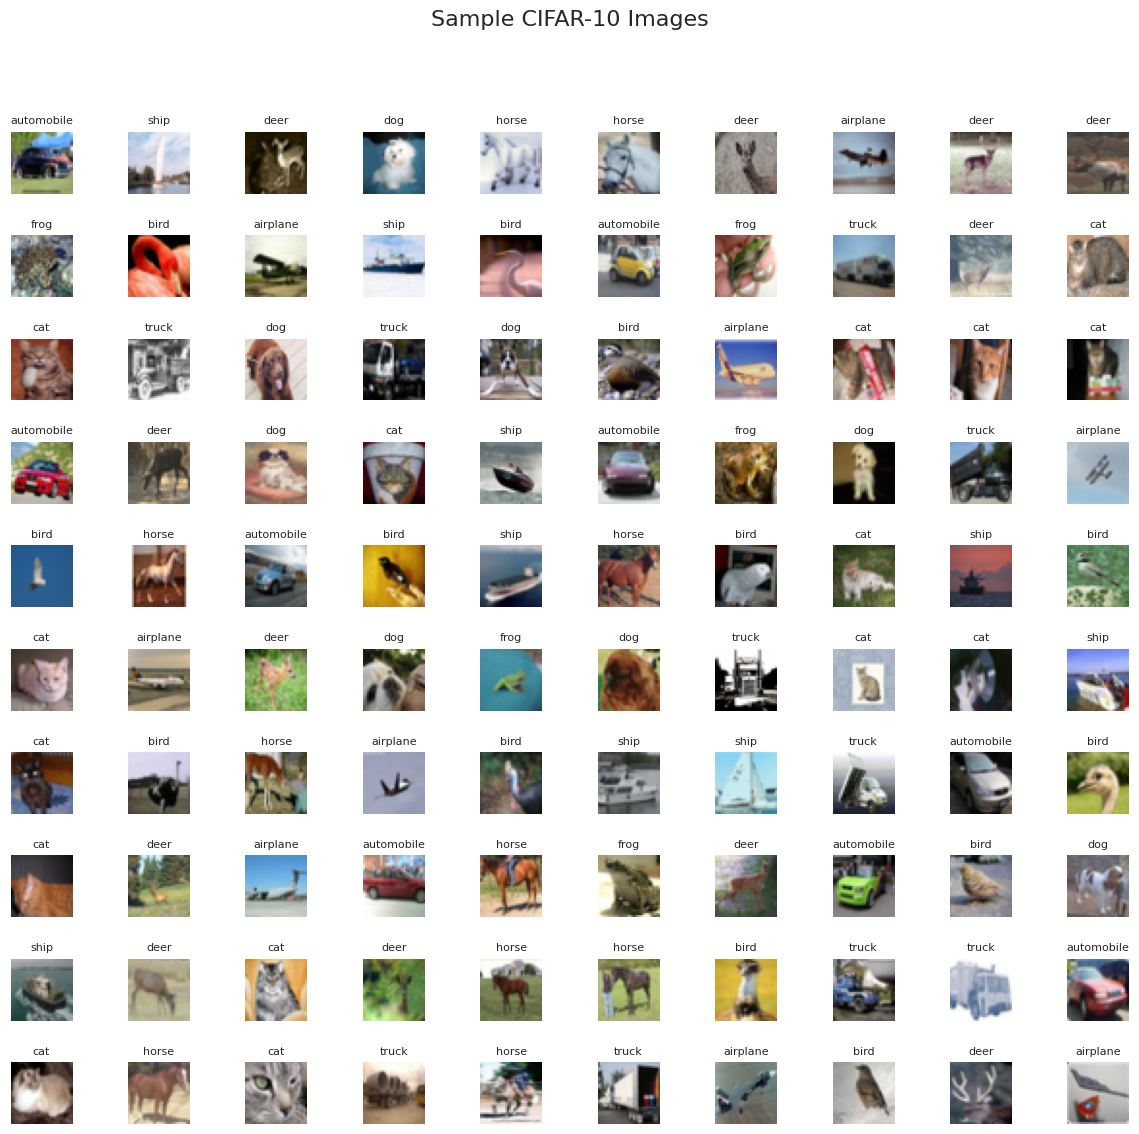

In [6]:
random_indices = random.sample(range(x_train.shape[0]), 100) # Ensure you sample from x_train.shape[0] (50000)

plt.figure(figsize=(12, 12)) # Adjusted figure size for better visibility
plt.suptitle("Sample CIFAR-10 Images", fontsize=16) # Add a main title

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)
    plt.imshow(x_train[idx])
    plt.title(f"{classes[y_train[idx][0]]}", fontsize=8) # Display class name
    plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

display an image and its raw pixel values for inspecting individual data points. As wel as show the first 5 training and testing label befor one hot encoding


Shape of first training label (y_train[0]): [6]
Raw pixel values of first training image (x_train[0]):
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


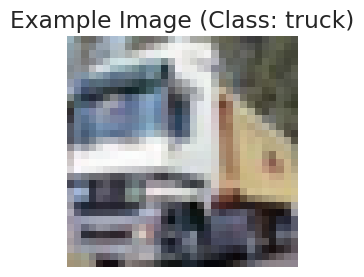


Raw labels (y_train and y_test before one-hot encoding):
[6 9 9 4 1]
[3 8 8 0 6]


In [7]:

print("\nShape of first training label (y_train[0]):", y_train[0])
print("Raw pixel values of first training image (x_train[0]):")
print(x_train[0])
plt.figure(figsize=(3,3))
plt.imshow(x_train[1])
plt.title(f"Example Image (Class: {classes[y_train[1][0]]})")
plt.axis("off")
plt.show()
print("\nRaw labels (y_train and y_test before one-hot encoding):")
print(y_train[:5].flatten()) # Display first 5 training labels
print(y_test[:5].flatten())  # Display first 5 testing labels

### Data Preprocessing: Normalization
*   Normalize pixel values to be between 0 and 1.
*   Pixel values are currently 0-255, so divide by 255.0 to convert to float and scale.

* Normalizationis  crucial step for neural networks as it helps with faster convergence and better performance.

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"\nPixel min value after normalization: {x_train.min()}")
print(f"Pixel max value after normalization: {x_train.max()}")


Pixel min value after normalization: 0.0
Pixel max value after normalization: 1.0


### Data Preprocessing: One-Hot Encoding

*  Convert class vectors (integers 0-9) to binary class matrices (one-hot encoding). this step is required for classification where the output layer uses softmax activation and the loss function is categorical_crossentropy.

In [9]:
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
print(f"\ny_train shape after one-hot encoding: {y_train.shape}")
print(f"y_test shape after one-hot encoding: {y_test.shape}")
print("First 5 training labels after one-hot encoding:")
print(y_train[:5])


y_train shape after one-hot encoding: (50000, 10)
y_test shape after one-hot encoding: (10000, 10)
First 5 training labels after one-hot encoding:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Data Splitting: Create a Validation Set


*   Split the training data into training and validation sets.
 A validation set is important for monitoring model performance during training and for tuning hyperparameters without touching the test set.
*   test_size=0.2 means 20% of the original training data will be used for validation.


In [10]:

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

In [11]:
print(f"New training shape: {x_train.shape}")
print(f"Validation shape: {x_val.shape}")
print(f"Test shape: {x_test.shape}")

New training shape: (40000, 32, 32, 3)
Validation shape: (10000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


### Display raw pixel values of the first training image after normalization.

In [12]:

print("\nRaw pixel values of first training image (x_train[0]) after normalization:")
print(x_train[0])


Raw pixel values of first training image (x_train[0]) after normalization:
[[[0.13333333 0.14117647 0.16862745]
  [0.14509804 0.14509804 0.2       ]
  [0.17254902 0.17254902 0.25098039]
  ...
  [0.24313725 0.28627451 0.36470588]
  [0.20392157 0.24705882 0.3254902 ]
  [0.17647059 0.22352941 0.30196078]]

 [[0.1372549  0.1372549  0.14509804]
  [0.13333333 0.13333333 0.15686275]
  [0.13333333 0.12941176 0.16862745]
  ...
  [0.22745098 0.27058824 0.34901961]
  [0.19607843 0.23529412 0.31372549]
  [0.18431373 0.22745098 0.30588235]]

 [[0.13333333 0.12941176 0.1372549 ]
  [0.12941176 0.1254902  0.14117647]
  [0.12941176 0.1254902  0.14901961]
  ...
  [0.25882353 0.30196078 0.38039216]
  [0.2        0.24313725 0.32156863]
  [0.20784314 0.25098039 0.32941176]]

 ...

 [[0.1254902  0.1254902  0.14901961]
  [0.1254902  0.12156863 0.14509804]
  [0.12941176 0.12941176 0.14901961]
  ...
  [0.16078431 0.14901961 0.17647059]
  [0.13333333 0.12156863 0.14901961]
  [0.14117647 0.1254902  0.15686275]]


This means 40,000 images are allocated for training.

This means 10,000 images are allocated for validation.

The test data is still 10,000 images, which is the predefined split in CIFAR-10.



### to show the each class distribution we Convert one-hot encoded labels back to integer labels for counting and to show image dimention and count for channel.

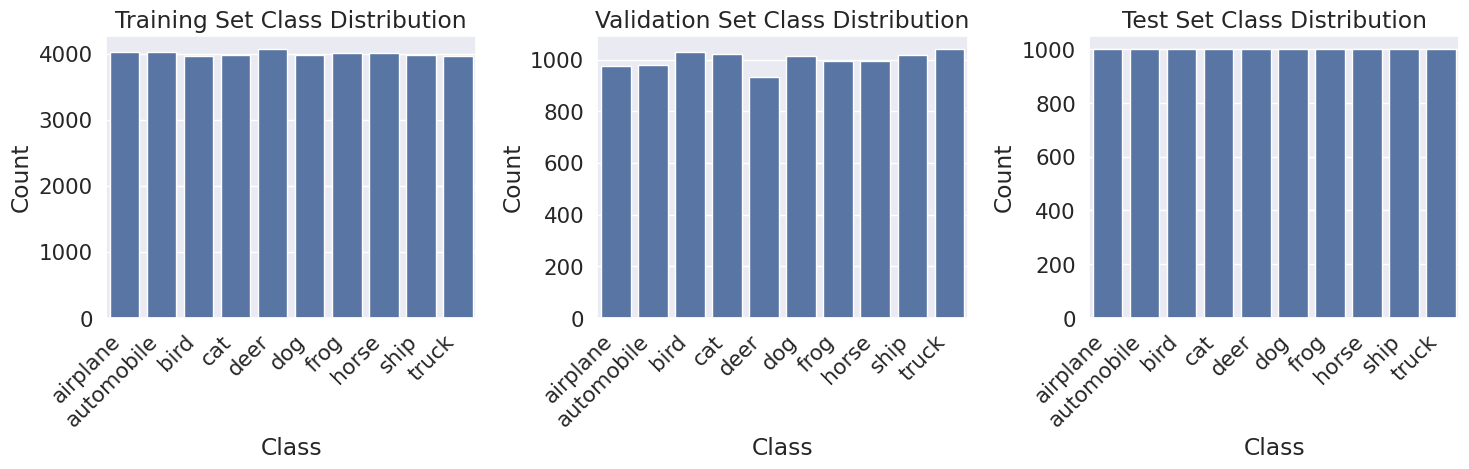


Image Height: 32
Image Width: 32
Number of Channels: 3
Number of Output Classes: 10


In [13]:

y_train_int = np.argmax(y_train, axis=1)
y_val_int = np.argmax(y_val, axis=1)
y_test_int = np.argmax(y_test, axis=1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=y_train_int)
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.countplot(x=y_val_int)
plt.title('Validation Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.countplot(x=y_test_int)
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')

plt.tight_layout()
plt.show()

IMG_HEIGHT, IMG_WIDTH, CHANNELS = x_train.shape[1:]
NUM_CLASSES = len(classes)

print(f"\nImage Height: {IMG_HEIGHT}")
print(f"Image Width: {IMG_WIDTH}")
print(f"Number of Channels: {CHANNELS}")
print(f"Number of Output Classes: {NUM_CLASSES}")

CNN model construction (LO1, LO2, LO3)

# *Model* building and training

##Convolutional Neural Network (CNN) model construction (LO1, LO2, LO3)

we buils a CNN model Convolutional Layers:

You use multiple Conv2D layers with increasing filter numbers (32 → 64 → 128)of size (3,3) with relu activation, which is a good strategy to learn complex features. input shape is (32x32 pixels,3 color channel)

in addition to it is good use of small kernel sizes (3x3) which are standard and efficient for image tasks.





*   Batch Normalization:




Normalizing after some layers improves convergence and stability.

You use it correctly after convolutional and dense layers.





*   Dropout:



Prevents overfitting. 25% and 50% are standard dropout values and nicely placed after pooling and dense layers.





*   MaxPooling:



Properly reduces spatial dimensions after convolutional layers. Efficient and reduces model size.



*   Final Dense Layers:

Dense(256) gives sufficient learning capacity before the final classification.

Dense(10, activation='softmax') is correct for multi-class classification on CIFAR-10.

Dense layer with 10 units (equal to the number of classes in CIFAR-10)

*   Learning Rate Scheduler


You used ExponentialDecay which is a smart move for gradual training adjustments.

Helps in stable convergence instead of fixed learning rates.

Compilation:

Adam optimizer and sparse_categorical_crossentropy correct for integer labels in CIFAR-10.

In [14]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

model = create_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,064,522 (4.06 MB)

 Trainable params: 1,063,690 (4.06 MB)

 Non-trainable params: 832 (3.25 KB)

we can show the model construction by using plot_model

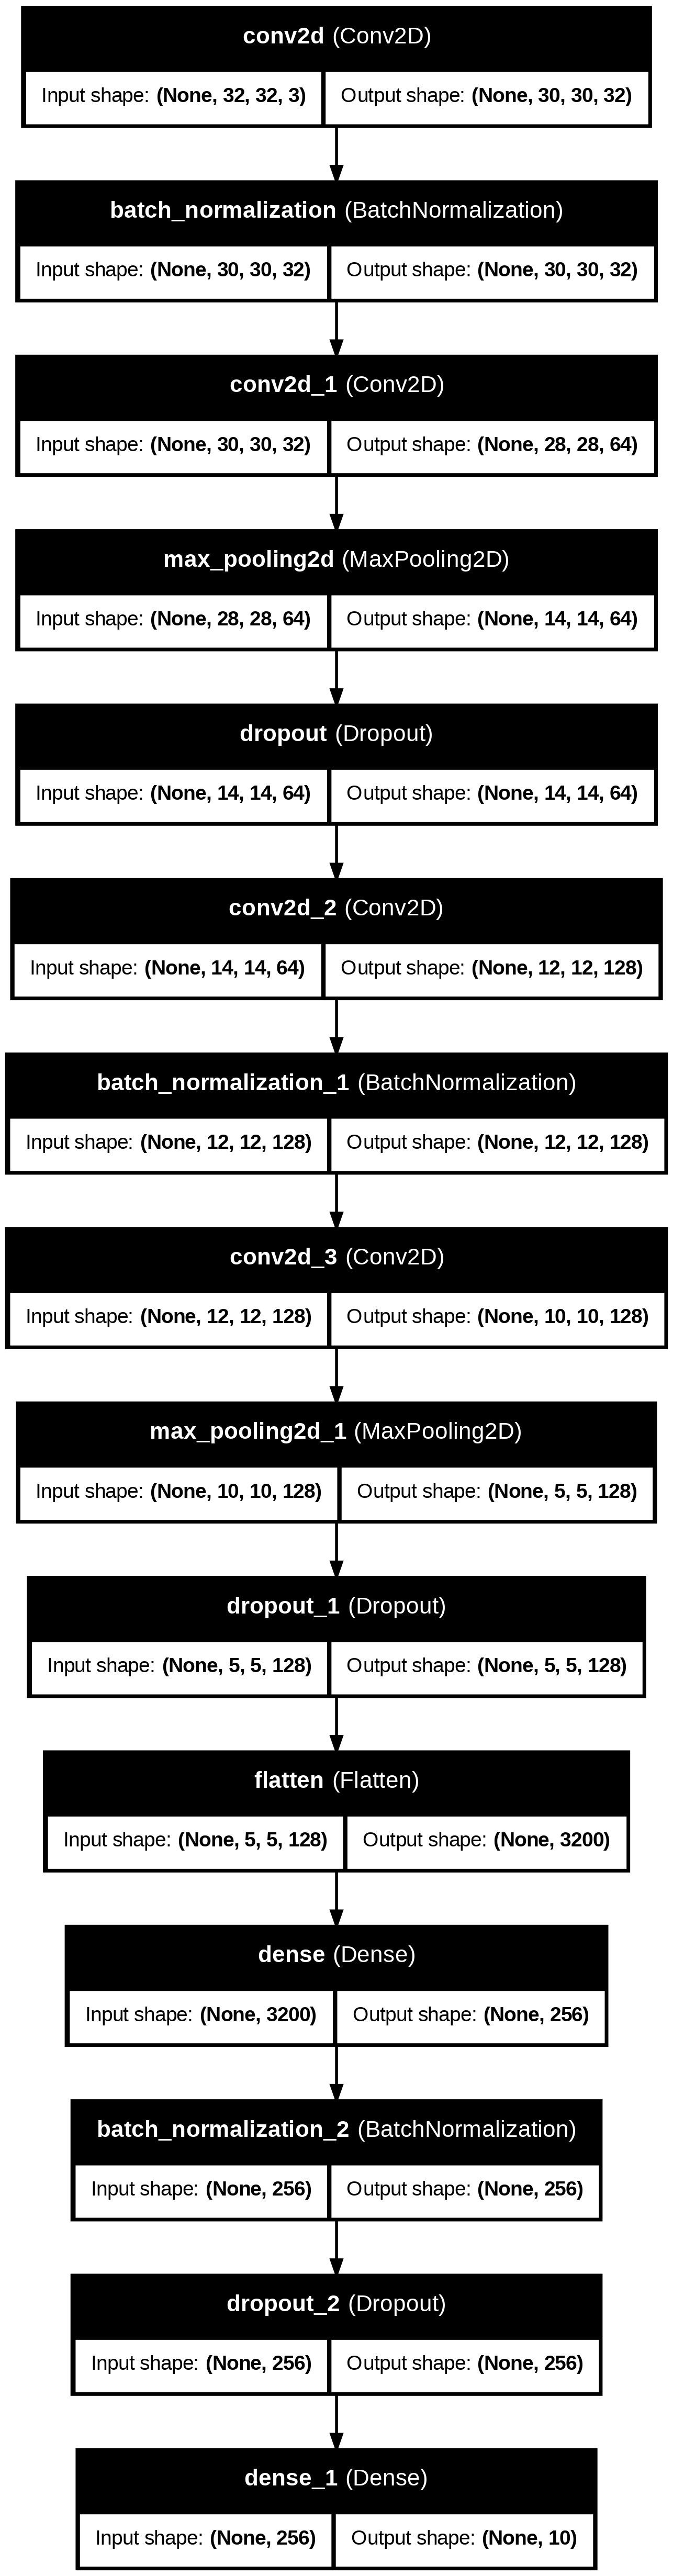

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

Displaying enhanced CNN model visualization with visualkeras using keras plot_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 12.6 MB/s eta 0:00:00

 Displaying enhanced model visualization with visualkeras:


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


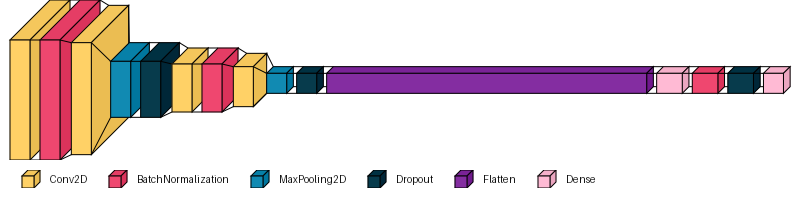

In [16]:
!pip install visualkeras
import visualkeras
from tensorflow.keras.utils import plot_model
print("\n Displaying enhanced model visualization with visualkeras:")
visualkeras.layered_view(model, legend=True, to_file='cnn_visualkeras_plot.png')


# 3-Training/validation/testing (LO1, LO2, LO3)

A- Define Callbacks

*   Callbacks are tools to take actions at certain points during training (e.g., at the end of an epoch).
*   EarlyStopping: patience=15 IT Mean Training will stop if 'val_loss' does not improve for 15 consecutive epochs.

*   restore_best_weights=True, the model automatically returns to the best weights recorded during training
* ReduceLROnPlateaumean factor=0.5 means that if 'val_loss' doesn't improve, the learning rate will be reduced by half.
 patience=5 means The learning rate will be reduced if 'val_loss' doesn't improve for 5 consecutive epochs to prevent oscillations or getting stuck in local minima.



In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
checkpoint = ModelCheckpoint(
    'best_cifar10_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Now, include the new `checkpoint` callback in your list:
callbacks_list = [early_stop, lr_reduce, checkpoint]

print(f"New training shape: {x_train.shape}")
print(f"Validation shape: {x_val.shape}")
print(f"Test shape: {x_test.shape}")


New training shape: (40000, 32, 32, 3)
Validation shape: (10000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


B- Train the Model

In [18]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 385s 595ms/step - accuracy: 0.3705 - loss: 1.9233 - val_accuracy: 0.5040 - val_loss: 1.3702 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 368s 576ms/step - accuracy: 0.6214 - loss: 1.0755 - val_accuracy: 0.6225 - val_loss: 1.0556 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 358s 538ms/step - accuracy: 0.6882 - loss: 0.8949 - val_accuracy: 0.6988 - val_loss: 0.8749 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 336s 538ms/step - accuracy: 0.7292 - loss: 0.7792 - val_accuracy: 0.6191 - val_loss: 1.1900 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 338s 540ms/step - accuracy: 0.7434 - loss: 0.7277 - val_accuracy: 0.7172 - val_loss: 0.8121 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 352s 563ms/step - accuracy: 0.7785 - loss: 0.6392 - val_accuracy: 0.7249 - val_loss: 0.7936 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 384s 567ms/step - accura

D- Visualize Training & Validation Performance (accuracy and loss)

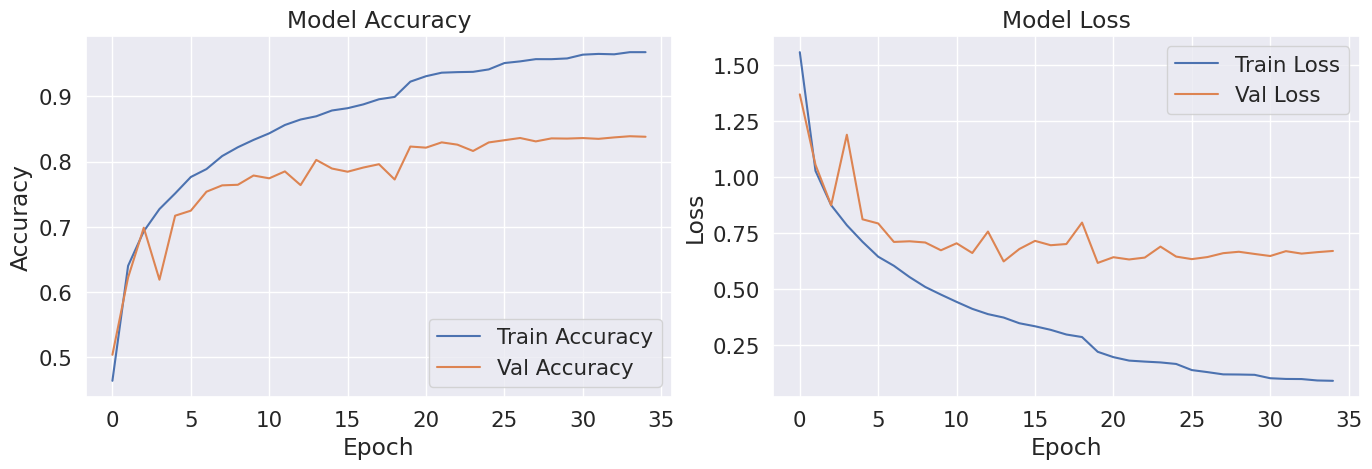

In [19]:

def plot_history(history):
    """
    Plots the training and validation accuracy and loss over epochs.
    """
    plt.figure(figsize=(14, 5))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy') # 'val_accuracy' is the correct key
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True) # Add grid for better readability

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss') # 'val_loss' is the correct key
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True) # Add grid for better readability

    plt.tight_layout() # Adjusts subplot params for a tight layout
    plt.show()

# Call the plotting function to display the training progress
plot_history(history)


Evaluate the model on the validation set to explicitly get the final validation metrics after training, especially if EarlyStopping restored best weights.

In [20]:
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

313/313 - 41s - 132ms/step - accuracy: 0.8232 - loss: 0.6173
Validation Accuracy: 82.32%
Validation Loss: 0.6173


Evaluate the model on the TEST set

In [21]:



print("\n--- Evaluating on Test Set ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


--- Evaluating on Test Set ---
313/313 - 21s - 66ms/step - accuracy: 0.8166 - loss: 0.6304
Test Accuracy: 81.66%
Test Loss: 0.6304


#4. Model performance discussion and analysis (LO1, LO4)

As a sign of overfitting observed in the previous training, we used data augmentation to cover this issue and improve the model's ability for generalization.

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("\n--- Setting up Data Augmentation ---")
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)
print("Data augmentation generator configured and fitted to training data.")


--- Setting up Data Augmentation ---
Data augmentation generator configured and fitted to training data.


model training with data augmentation


*  Convolutional Neural Network (CNN) model implemented with data augmentation to enhance the model's generalization and mitigate overfittin.The Adam optimizer was selected for its efficiency and robust performance. callbacks are used to optimize and monitor the process,Early Stopping prevents overfitting by halting training when validation loss ceases to improve. The model's performance is evaluated on both the validation and test datasets."

* we trained the model with 50 epoch but we retrained it with 150 epoch to get better accuracy




--- SECOND TRAINING With Data Augmentation ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.3452 - loss: 2.0018
Epoch 1: val_accuracy improved from -inf to 0.58400, saving model to best_cifar10_model_with_aug.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 364s 576ms/step - accuracy: 0.3454 - loss: 2.0013 - val_accuracy: 0.5840 - val_loss: 1.1794 - learning_rate: 0.0010
Epoch 2/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.5515 - loss: 1.2518
Epoch 2: val_accuracy did not improve from 0.58400
625/625 ━━━━━━━━━━━━━━━━━━━━ 385s 616ms/step - accuracy: 0.5515 - loss: 1.2517 - val_accuracy: 0.4775 - val_loss: 1.6706 - learning_rate: 0.0010
Epoch 3/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.6239 - loss: 1.0684
Epoch 3: val_accuracy did not improve from 0.58400
625/625 ━━━━━━━━━━━━━━━━━━━━ 417s 575ms/step - accuracy: 0.6240 - loss: 1.0684 - val_accuracy: 0.4952 - val_loss: 1.5951 - learning_rate: 0.0010
Epoch 4/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.6666 - loss: 0.9555
Epoch 4: val_acc

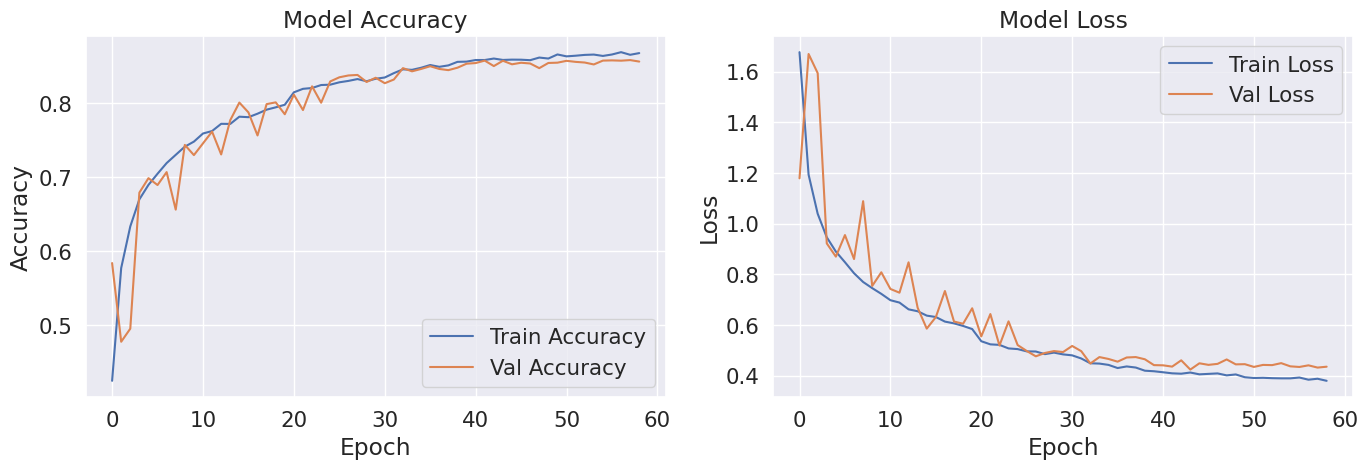

313/313 - 20s - 62ms/step - accuracy: 0.8578 - loss: 0.4237
Validation Accuracy (With Aug): 85.78%
Validation Loss (With Aug): 0.4237
313/313 - 20s - 65ms/step - accuracy: 0.8574 - loss: 0.4358
Test Accuracy (With Aug): 85.74%
Test Loss (With Aug): 0.4358


In [23]:
print("\n--- SECOND TRAINING With Data Augmentation ---")
# RE-CREATE THE MODEL FOR A FRESH START
model_with_aug = create_model()
optimizer_with_aug = tf.keras.optimizers.Adam(learning_rate=0.001) # Or re-use the 'optimizer' variable
model_with_aug.compile(optimizer=optimizer_with_aug, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for this run (use a different filename for the checkpoint!)
early_stop_aug = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce_aug = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
checkpoint_aug = ModelCheckpoint('best_cifar10_model_with_aug.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
callbacks_list_aug = [early_stop_aug, lr_reduce_aug, checkpoint_aug]

history_with_aug = model_with_aug.fit(
    datagen.flow(x_train, y_train, batch_size=64), # Use the data generator here!
    epochs=150,
    validation_data=(x_val, y_val),
    callbacks=callbacks_list_aug,
    steps_per_epoch=len(x_train) // 64
)

plot_history(history_with_aug) # Use the function you defined
val_loss_with_aug, val_acc_with_aug = model_with_aug.evaluate(x_val, y_val, verbose=2)
print(f"Validation Accuracy (With Aug): {val_acc_with_aug * 100:.2f}%")
print(f"Validation Loss (With Aug): {val_loss_with_aug:.4f}")

test_loss_with_aug, test_acc_with_aug = model_with_aug.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy (With Aug): {test_acc_with_aug * 100:.2f}%")
print(f"Test Loss (With Aug): {test_loss_with_aug:.4f}")


 generating prdection for test set

1. Make Predictions on the Test Set.
model can predict returns probabilities for each class.


In [24]:

print("\n--- Generating Predictions for Test Set ---")
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


--- Generating Predictions for Test Set ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step


 Print Classification Report which provides precision, recall, f1-score, and support for each class.


In [25]:
print("\n--- Classification Report ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))


--- Classification Report ---
              precision    recall  f1-score   support

    airplane       0.85      0.83      0.84      1000
  automobile       0.96      0.85      0.90      1000
        bird       0.74      0.71      0.73      1000
         cat       0.72      0.65      0.68      1000
        deer       0.73      0.87      0.79      1000
         dog       0.83      0.67      0.74      1000
        frog       0.80      0.90      0.85      1000
       horse       0.85      0.85      0.85      1000
        ship       0.85      0.91      0.88      1000
       truck       0.86      0.92      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



Confusion Matrix to visual representation of correct and incorrect predictions per class.


--- Plotting Confusion Matrix ---


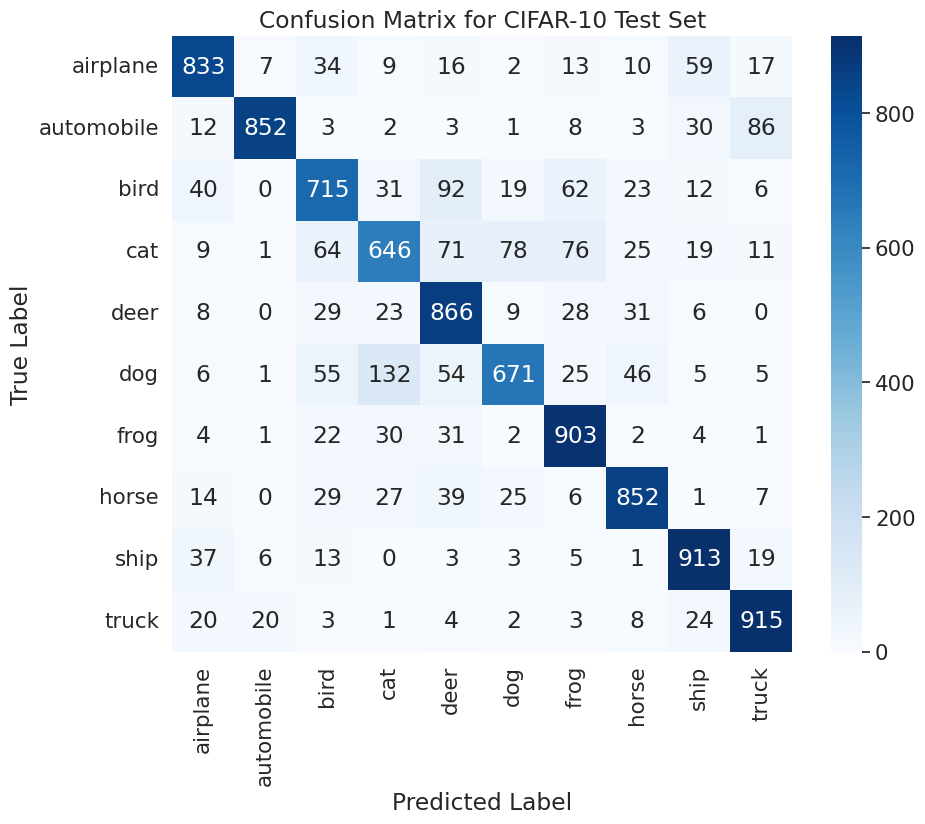

In [26]:
print("\n--- Plotting Confusion Matrix ---")
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CIFAR-10 Test Set')
plt.show()

we Confidence Histogram to visualize the prediction confidence distribution


--- Plotting Prediction Confidence Distribution ---


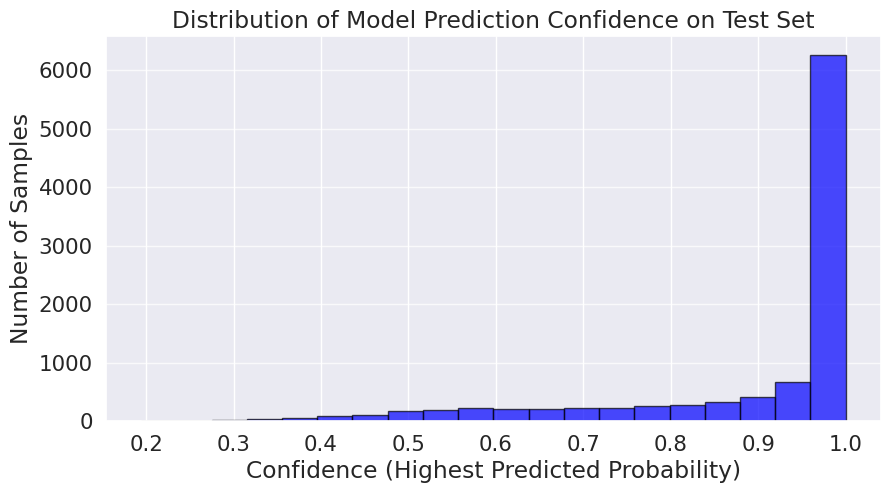

In [27]:
print("\n--- Plotting Prediction Confidence Distribution ---")
confidences = np.max(y_pred_probs, axis=1)
plt.figure(figsize=(10, 5))
plt.hist(confidences, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of Model Prediction Confidence on Test Set")
plt.xlabel("Confidence (Highest Predicted Probability)")
plt.ylabel("Number of Samples")
plt.grid(axis='y', alpha=0.75)
plt.show()

The prediction confidence distribution plot shows that the model is highly confident in the majority of classifications on the test set, with over 6000 samples having a confidence score above 0.95. This indicates strong learning and reliability for most predictions.

to visualizing mis classification Images we takes a random sample of misclassified images to display

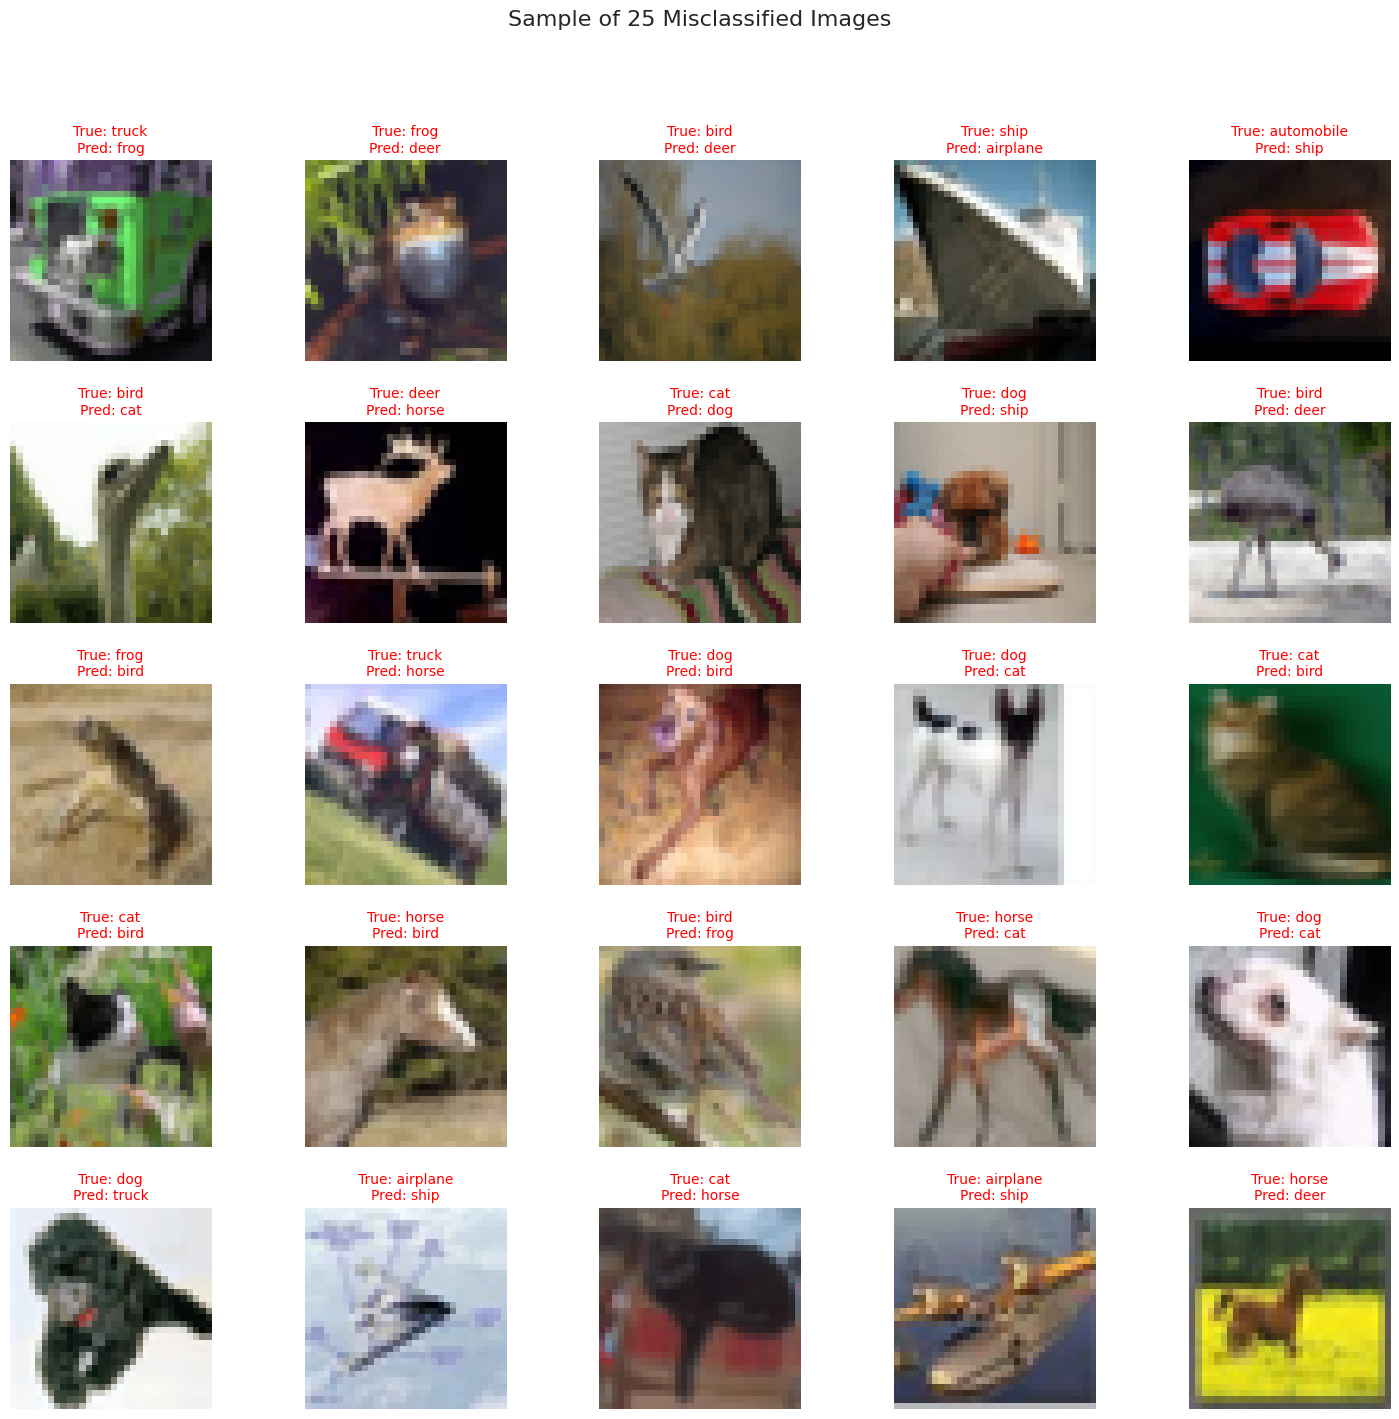

In [29]:
print("\n--- Visualizing Misclassified Images ---")
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]

num_display = min(25, len(misclassified_indices))
if num_display > 0:
    sample_misclassified_indices = np.random.choice(misclassified_indices, num_display, replace=False)

    plt.figure(figsize=(15, 15))
    plt.suptitle(f"Sample of {num_display} Misclassified Images", fontsize=16)

    for i, idx in enumerate(sample_misclassified_indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_test[idx])
        true_label = classes[y_true_classes[idx]]
        predicted_label = classes[y_pred_classes[idx]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color='red', fontsize=10)
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("No misclassified images to display (or model is perfect!).")

#NAO codes and demonstriation with NAO Robot Robot

In [ ]:
!pip install naoqi

import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from naoqi import ALProxy


# NAO connection details
NAO_IP = "172.18.16.54"  # replace with your robot's IP
NAO_PORT = 9559

# CIFAR-10 class labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', ' horse', 'ship', 'truck']

# 1. Connect to NAO camera
video = ALProxy("ALVideoDevice", "172.18.16.54" , 9559)
resolution = 2    # 640x480
color_space = 11  # RGB
fps = 5

# Subscribe to the video feed
name_id = video.subscribeCamera("python_client",0, resolution, color_space, fps)

# 2. Get image from NAO
nao_image = video.getImageRemote(name_id)
video.unsubscribe(name_id)

width = nao_image[0]
height = nao_image[1]
array = nao_image[6]

# Convert image to np array
image = np.frombuffer(array, dtype=np.uint8).reshape((height, width, 3))

# Optional: Save or display
cv2.imwrite("nao_captured.jpg", image)
cv2.imshow("Captured", image)
cv2.waitKey(0)

# 3. Preprocess image to 32x32 as in CIFAR-10
resized_img = cv2.resize(image, (32, 32))  # Resizing the image
normalized_img = resized_img.astype('float32') / 255.0  # Normalizing the image
input_img = normalized_img.reshape(1, 32, 32, 3)  # Reshaping for the model

# 4. Build the same CNN model used for CIFAR-10
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Load trained weights (ensure you have the right weights)
model.load_weights('my_model_weights1.h5')

# 6. Predict the class
pred = model.predict(input_img)
predicted_class = np.argmax(pred)
predicted_label = cifar10_labels[predicted_class]

print("Predicted class:", predicted_label)

# 7. Make NAO speak the result
tts = ALProxy("ALTextToSpeech", "172.18.16.54" , 9559)
tts.say(" this is a " + predicted_label)
file = open("result.txt",'w')
file.write(predicted_label)
file.close()